In [3]:
import cobra
from cobra.flux_analysis import production_envelope

import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

In [4]:
model_path = '../../models/json/iML1515.json'
model = cobra.io.load_json_model(model_path)

# add acetyl-coa demand
model.add_boundary(model.metabolites.get_by_id("accoa_c"), type="demand")

# set oxygen boundary
model.reactions.get_by_id('EX_o2_e').lower_bound = -20

# set glucose boundary
model.reactions.get_by_id('EX_glc__D_e').lower_bound = -10

# model.objective = "DM_accoa_c"

# cobra.io.save_matlab_model(model, "../../models/mat/test.mat")

In [7]:


def external_reactions(self):
    return [
        'EX_' + molecule
        for molecule in self.external_molecules]

print(external_reaction)

AttributeError: 'Model' object has no attribute 'external_molecules'

In [58]:
# set model objective to acetyl-coa demand

solution = model.optimize()

print('production rate: ', solution.objective_value)
print(model.metabolites.accoa_c.summary())

production rate:  0.821797933626578
accoa_c
Formula: C23H34N7O17P3S

Producing Reactions
-------------------
Percent      Flux Reaction                                                         Definition
  0.00% 0.0003682    PAI2T                              coa_c + dhptdd_c --> accoa_c + dhap_c
 99.12%     10.14      PDH                 coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
  0.87%   0.08937     POR5 coa_c + 2.0 flxso_c + pyr_c <=> accoa_c + co2_c + 2.0 flxr_c + h_c

Consuming Reactions
-------------------
Percent     Flux Reaction                                                 Definition
  5.72%  -0.5849  ACACT1r                            2.0 accoa_c <=> aacoa_c + coa_c
  2.86%  -0.2925  ACACT2r                     accoa_c + btcoa_c <=> 3ohcoa_c + coa_c
  2.86%  -0.2925  ACACT3r                     accoa_c + hxcoa_c <=> 3oocoa_c + coa_c
  2.86%  -0.2925  ACACT4r                     accoa_c + occoa_c <=> 3odcoa_c + coa_c
  2.86%  -0.2925  ACACT5r                   accoa

In [59]:
# reaction knockouts

# model.reactions.PTAr.knock_out() # PTAr
# model.reactions.ACKr.knock_out() # ACKr
model.reactions.FUM.knock_out() # FUM
model.reactions.SUCOAS.knock_out() # SUC

solution = model.optimize()

print('production rate: ', solution.objective_value)
print(model.metabolites.accoa_c.summary())

production rate:  0.7565406542464496
accoa_c
Formula: C23H34N7O17P3S

Producing Reactions
-------------------
Percent      Flux Reaction                                                         Definition
  0.01% 0.0003389    PAI2T                              coa_c + dhptdd_c --> accoa_c + dhap_c
 98.52%     5.495      PDH                 coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
  1.48%   0.08228     POR5 coa_c + 2.0 flxso_c + pyr_c <=> accoa_c + co2_c + 2.0 flxr_c + h_c

Consuming Reactions
-------------------
Percent       Flux Reaction                                                 Definition
  9.65%    -0.5385  ACACT1r                            2.0 accoa_c <=> aacoa_c + coa_c
  4.83%    -0.2692  ACACT2r                     accoa_c + btcoa_c <=> 3ohcoa_c + coa_c
  4.83%    -0.2692  ACACT3r                     accoa_c + hxcoa_c <=> 3oocoa_c + coa_c
  4.83%    -0.2692  ACACT4r                     accoa_c + occoa_c <=> 3odcoa_c + coa_c
  4.83%    -0.2692  ACACT5r           

In [60]:
prod_env = production_envelope(
    model, ["EX_o2_e"], objective="DM_accoa_c", carbon_sources="EX_glc__D_e")

prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,0.0,1.5675,0.600875,0.700883,-20.000000
1,EX_glc__D_e,0.0,0.0,0.0,1.5675,0.600875,0.700883,-18.947368
2,EX_glc__D_e,0.0,0.0,0.0,1.5675,0.600875,0.700883,-17.894737
3,EX_glc__D_e,0.0,0.0,0.0,1.5675,0.600875,0.700883,-16.842105
4,EX_glc__D_e,0.0,0.0,0.0,1.5675,0.600875,0.700883,-15.789474


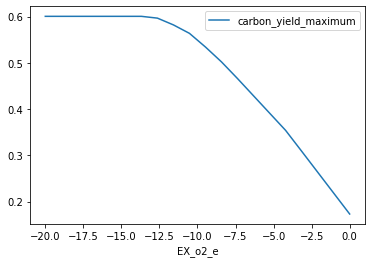

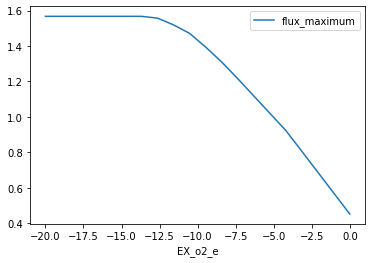

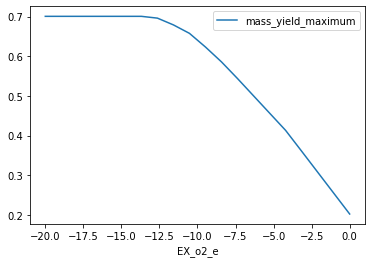

In [61]:
%matplotlib inline

prod_env.plot(
    kind='line', x='EX_o2_e', y='carbon_yield_maximum');

prod_env.plot(
    kind='line', x='EX_o2_e', y='flux_maximum');

prod_env.plot(
    kind='line', x='EX_o2_e', y='mass_yield_maximum');